In [1]:
from UTILITY_quickstart import *

In [2]:
importedDefaultSettings = loadConfig("setLattice_configs/2024-10-14_twoBunch_baseline.yml")

In [3]:
csrTF = False
evalElement = "PENT"
#evalElement = "BEGPDC"


inputBeamFilePathSuffix = importedDefaultSettings["inputBeamFilePathSuffix"]
bunchCount = importedDefaultSettings["bunchCount"]
tao = initializeTao(
    inputBeamFilePathSuffix = inputBeamFilePathSuffix,
    
    csrTF = csrTF,
    numMacroParticles=1e4,
    scratchPath = "/tmp",
    randomizeFileNames = True
)

Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
Tracking to end
CSR off
Overwriting lattice with setLattice() defaults
No defaults file provided to setLattice(). Using setLattice_configs/defaults.yml
Number of macro particles = 10000.0
Beam created, written to /tmp/beams/activeBeamFile_14258005951057950170.h5, and reinit to tao


In [4]:
#First load in the baseline lattice
setLattice(tao, **importedDefaultSettings)

In [5]:
#Override for 6 GeV
setLinacGradientAuto( tao, "L3", (-4.0e9) + 10.0e9 - 4.5e9 ) 

#Let the magnet autocompensation (on by default) do the heavy lifting!
#"2024-10-14_twoBunch_baseline.yml" already has centering and energy asserts disabled

#Beware though! Subsequent calls to setLattice() will cause trouble; it has hardcoded quad settings which will not respect the new energy

In [6]:
trackBeam(tao, 
          **importedDefaultSettings,
          verbose = True
         )

Loaded /tmp/beams/activeBeamFile_14258005951057950170.h5
Set track_start = L0AFEND, track_end = end
Tracking!
trackBeam() exiting


In [7]:
P = getBeamAtElement(tao, evalElement)

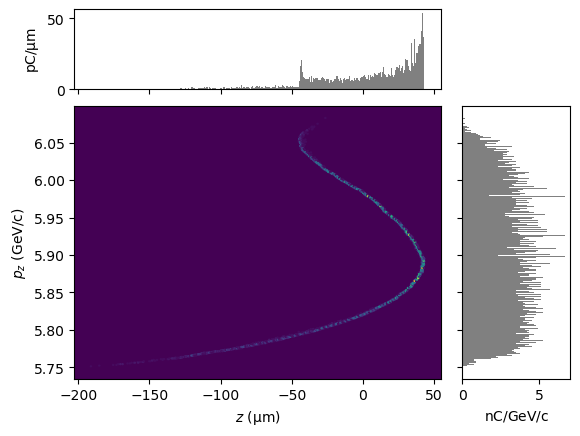

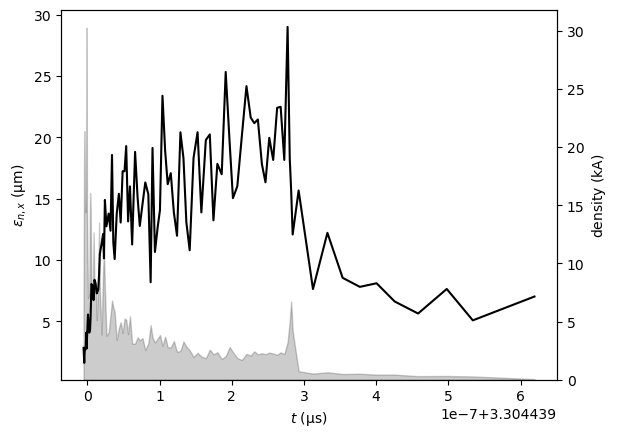

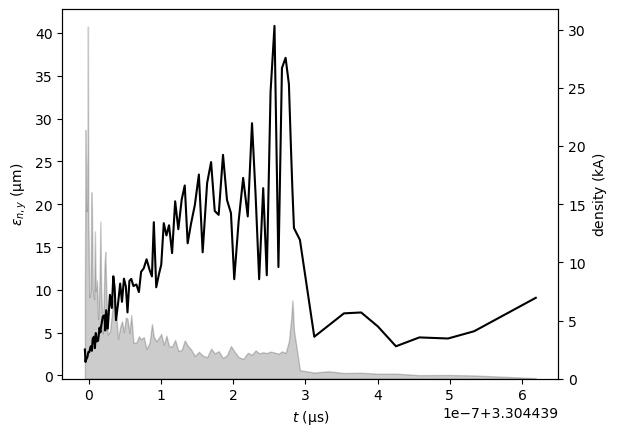

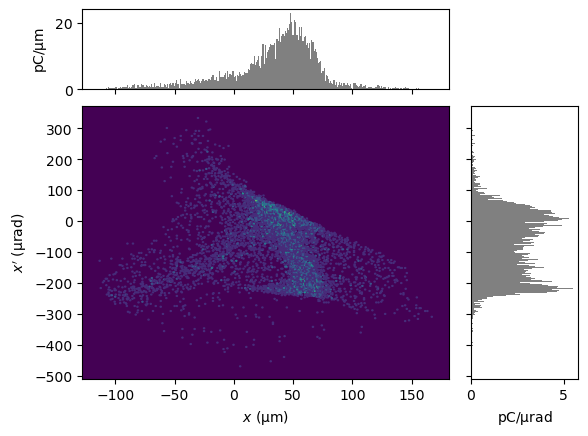

<Figure size 640x480 with 0 Axes>

In [8]:
display(plotMod(P, 'z', 'pz', bins=300))



display(slicePlotMod(P, 'norm_emit_x', slice_key = "t", n_slice=100))
display(slicePlotMod(P, 'norm_emit_y', slice_key = "t", n_slice=100))

display(plotMod(P, 'x', 'xp', bins=300))
plt.clf()

-55 -50


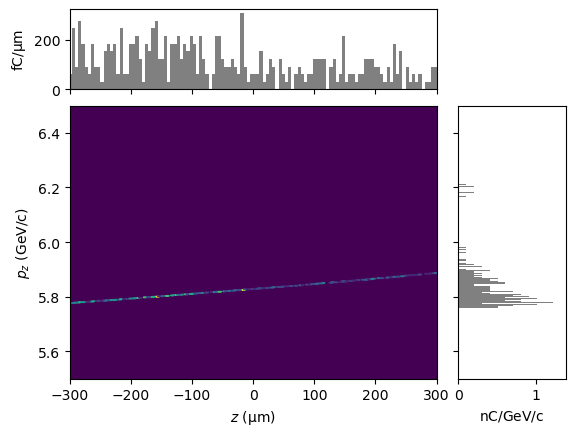

-55 -48


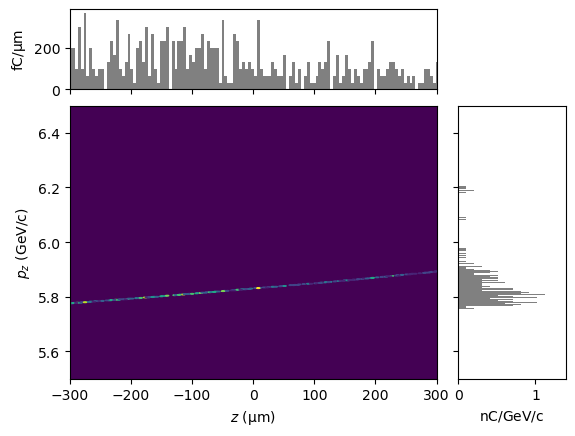

-55 -46


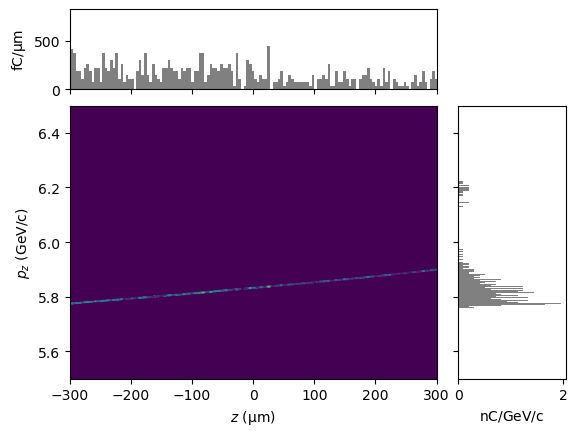

-55 -44


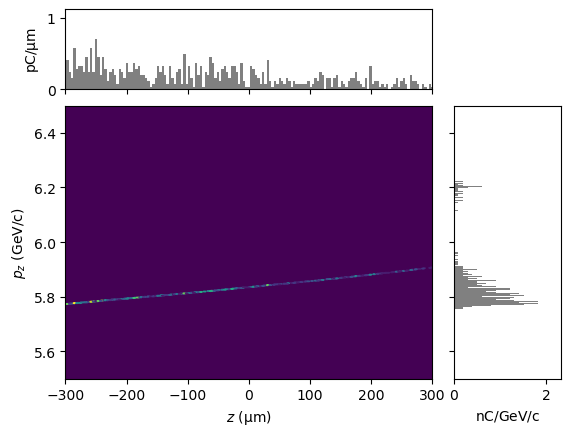

-55 -42


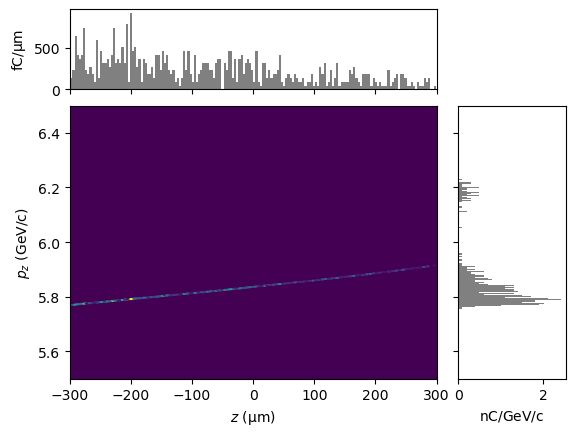

-55 -40


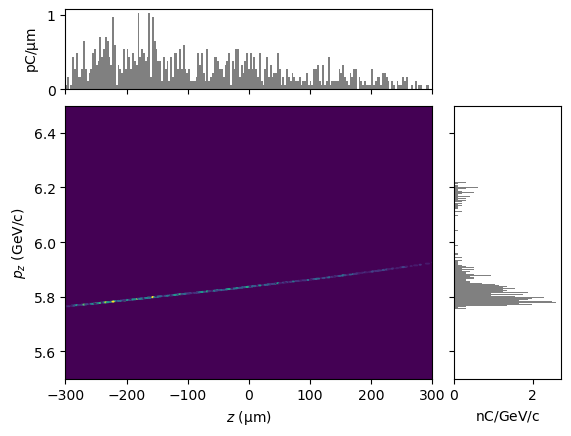

-55 -38


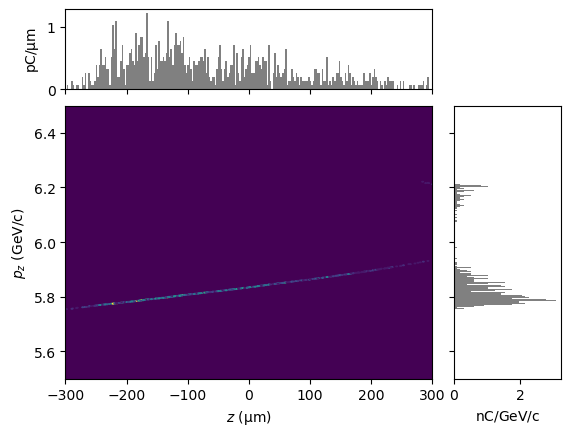

-55 -36


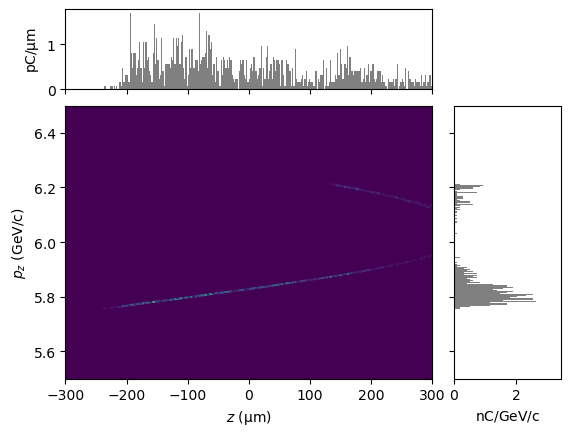

-55 -34


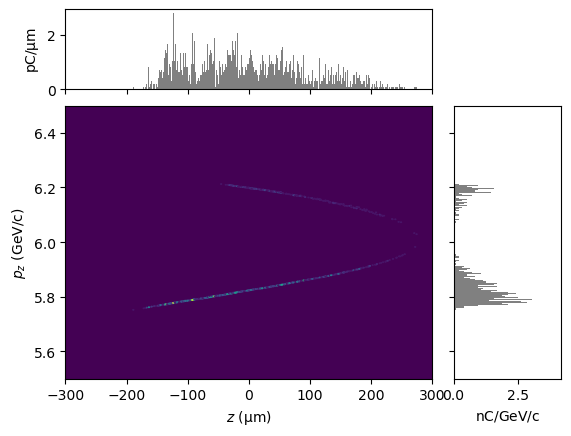

-55 -32


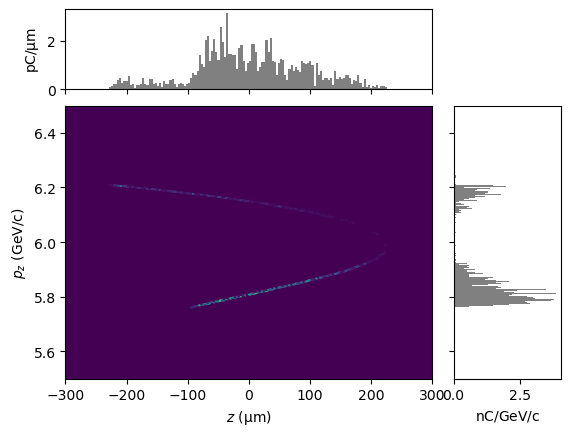

-53 -50


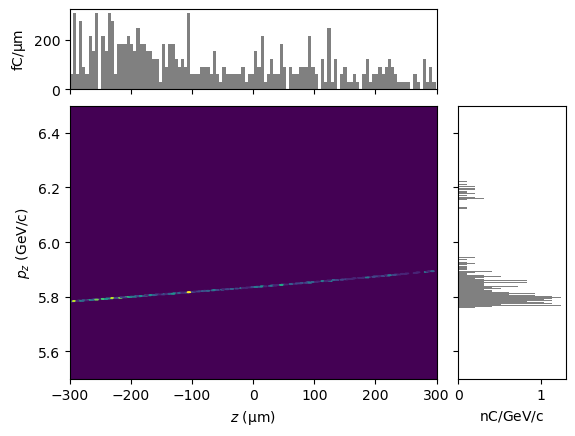

-53 -48


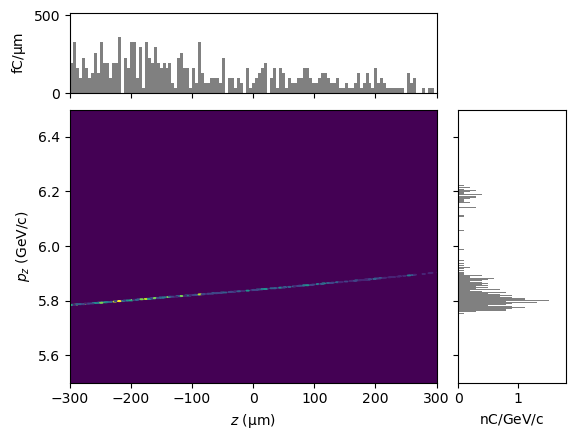

-53 -46


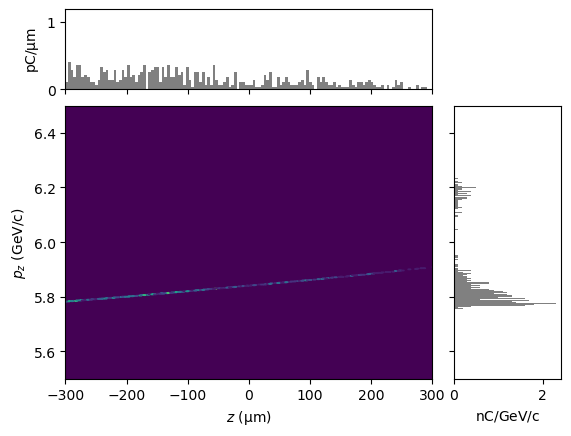

-53 -44


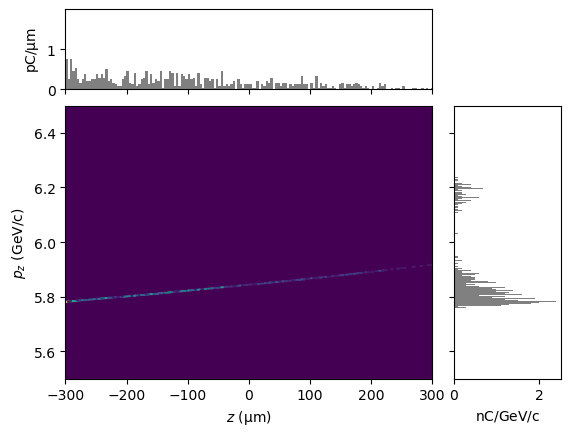

-53 -42


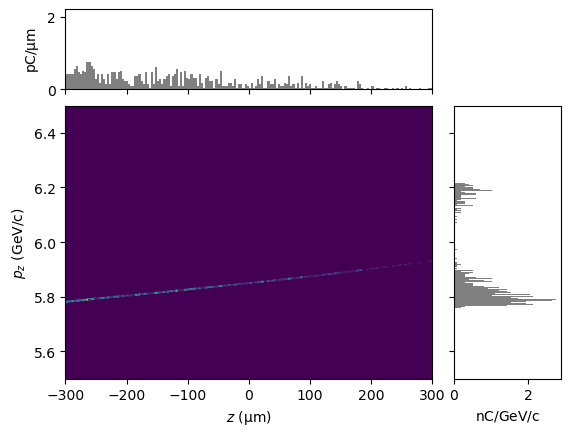

-53 -40


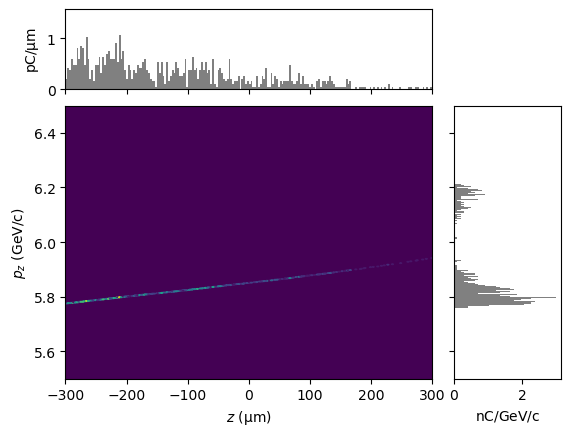

-53 -38


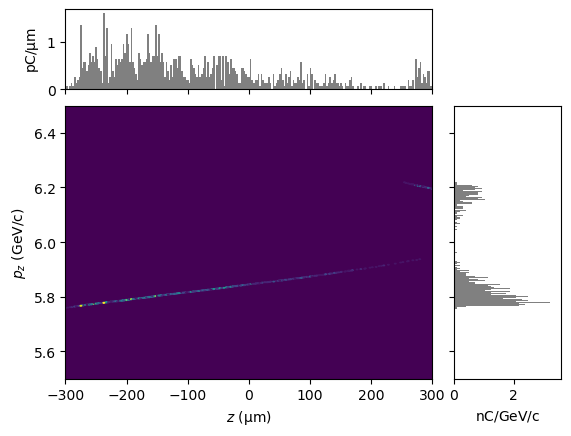

-53 -36


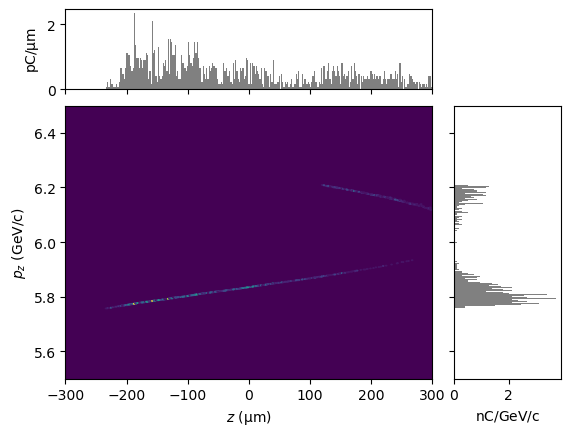

-53 -34


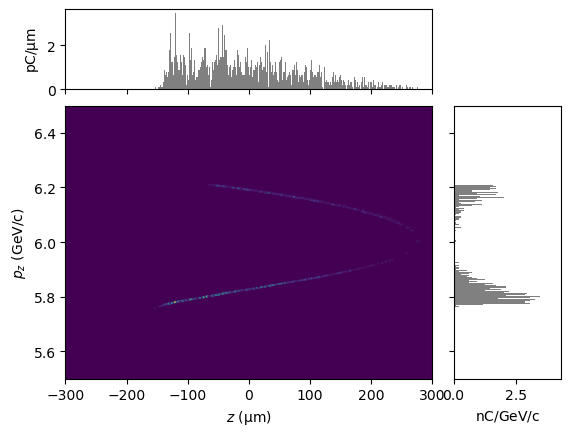

-53 -32


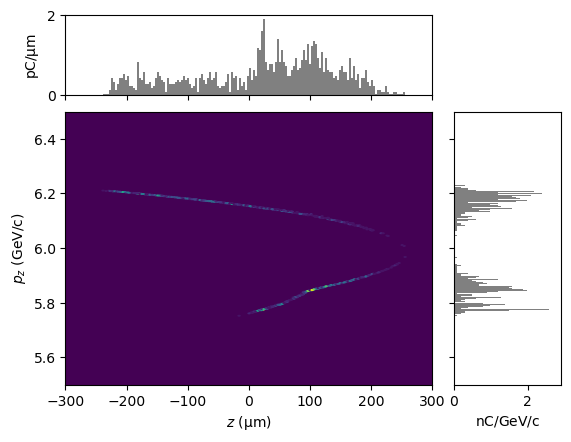

-51 -50


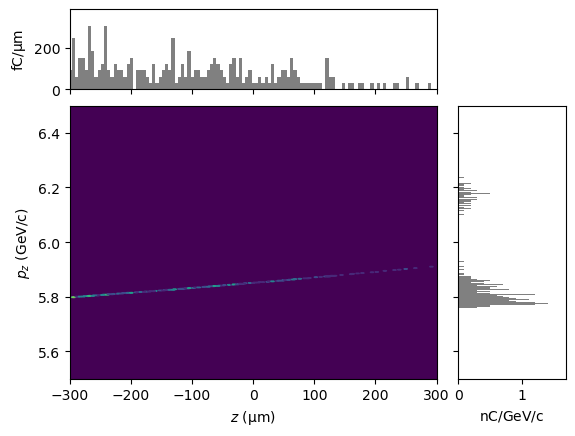

-51 -48


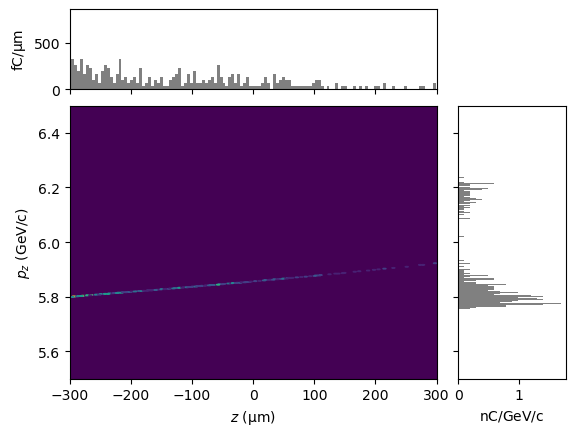

-51 -46


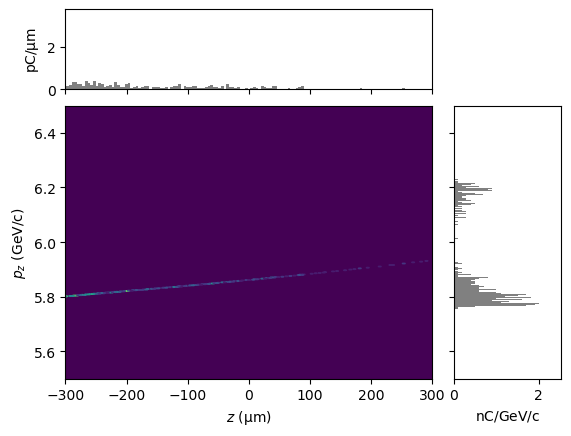

-51 -44


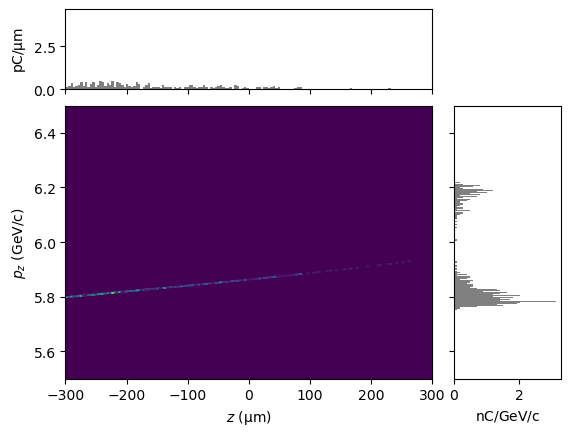

-51 -42


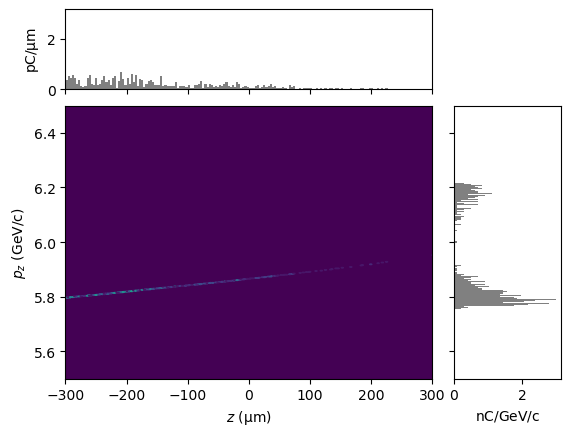

-51 -40


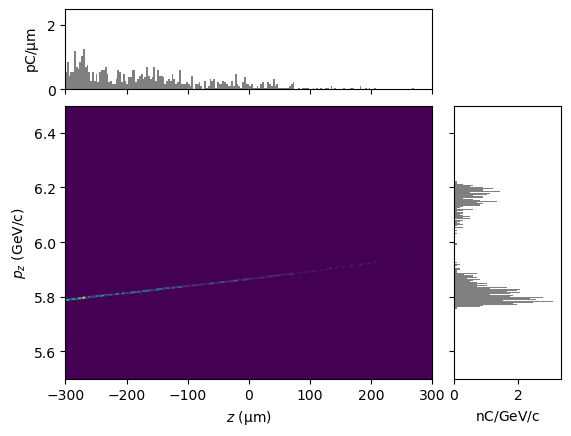

-51 -38


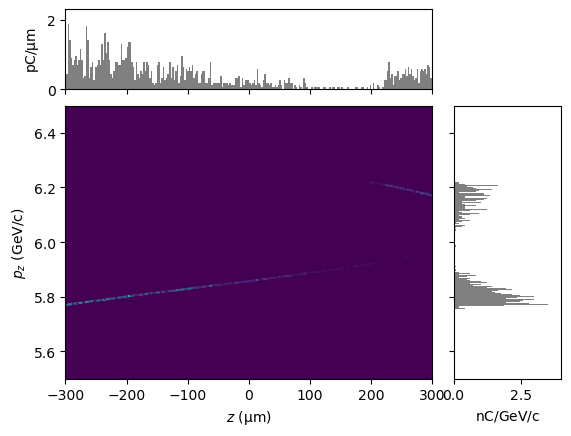

-51 -36


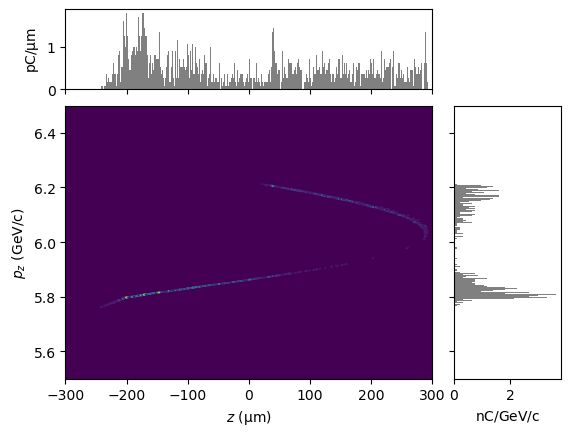

-51 -34


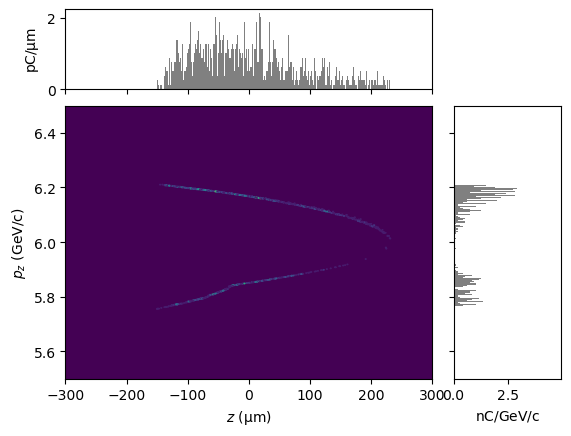

-51 -32


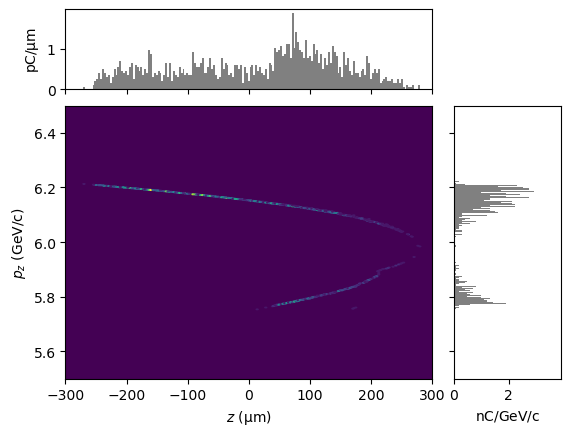

-49 -50


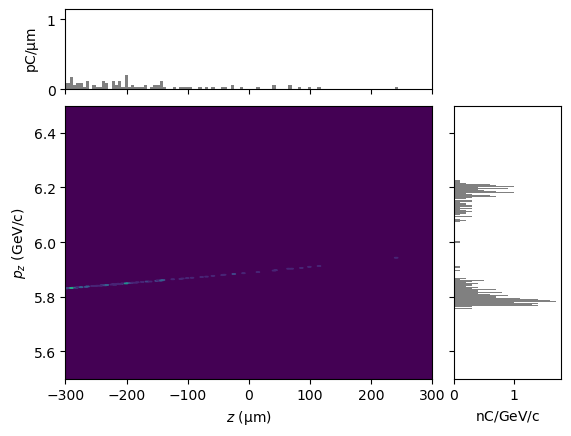

-49 -48


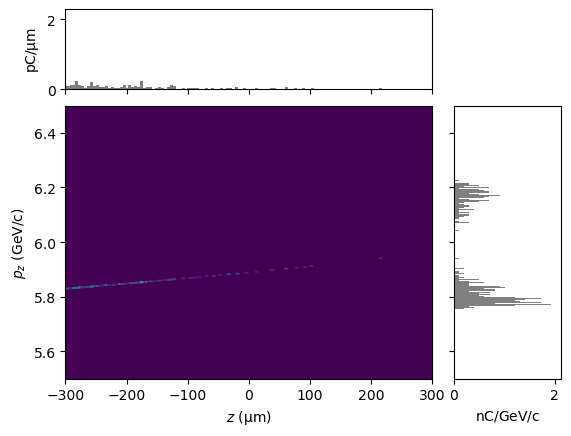

-49 -46


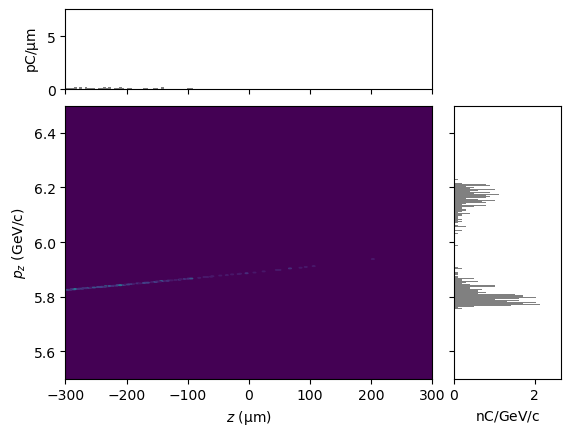

-49 -44


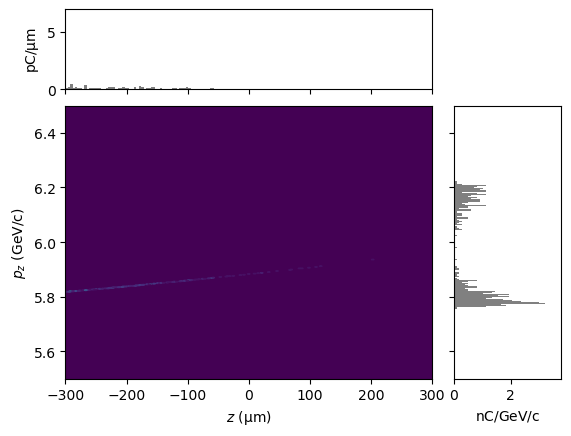

-49 -42


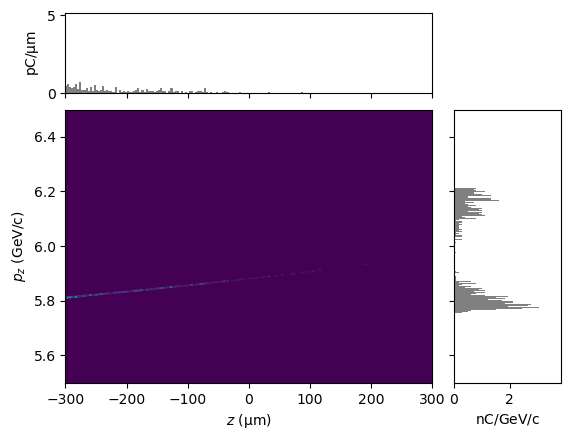

-49 -40


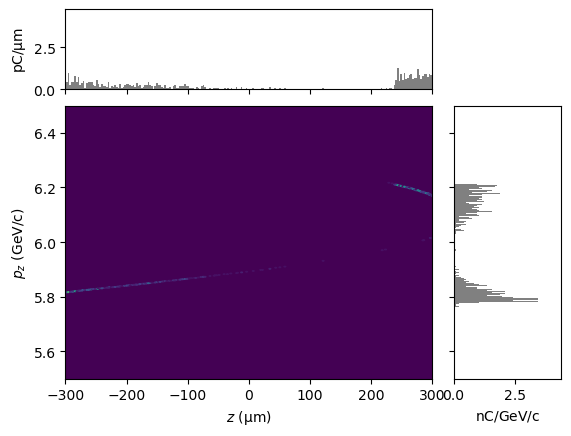

-49 -38


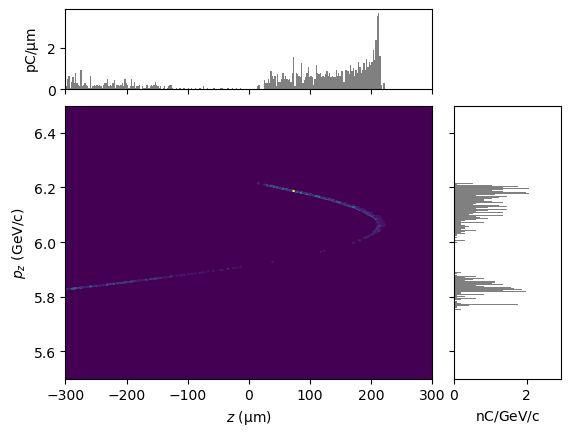

-49 -36


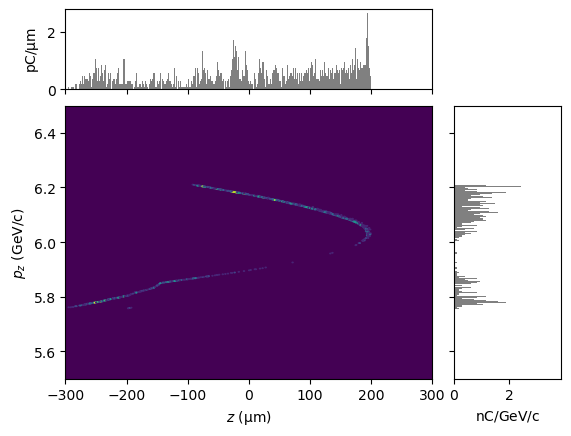

-49 -34


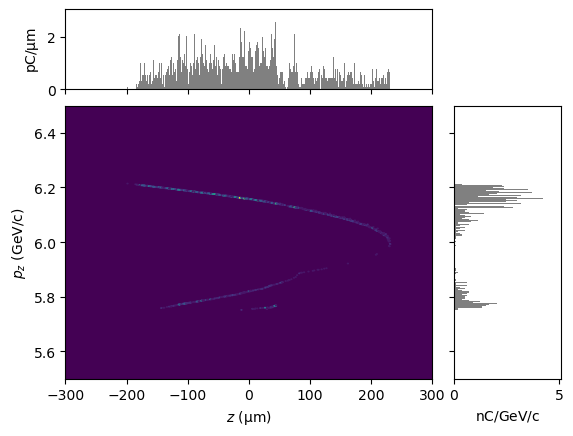

-49 -32


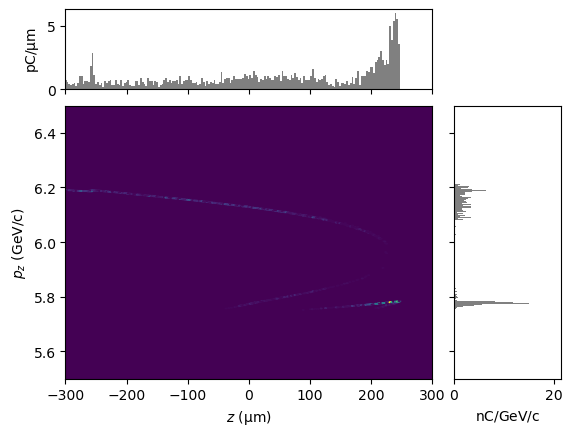

-47 -50


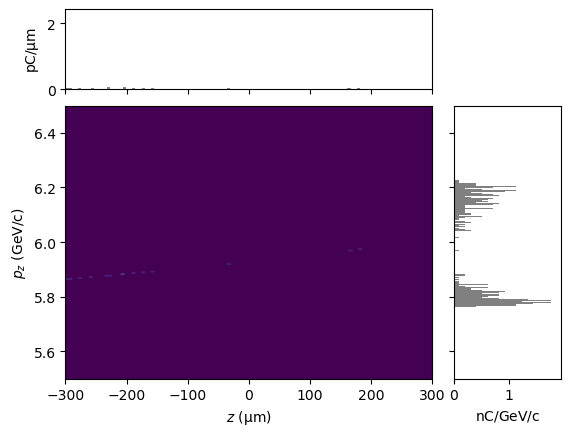

-47 -48


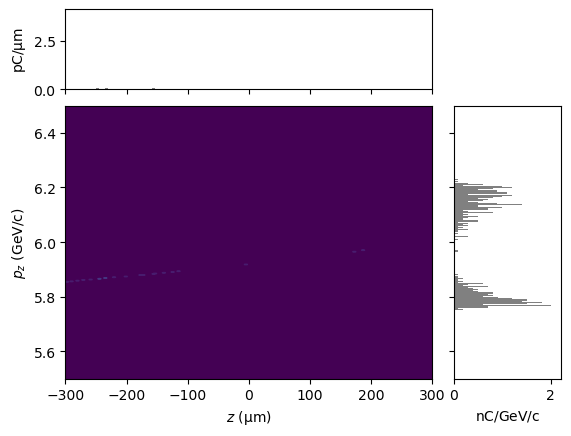

-47 -46


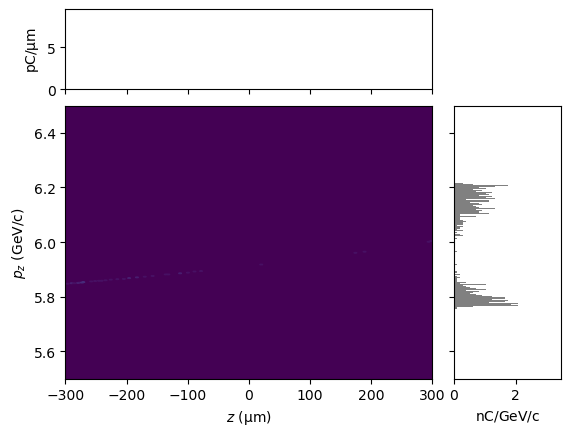

-47 -44


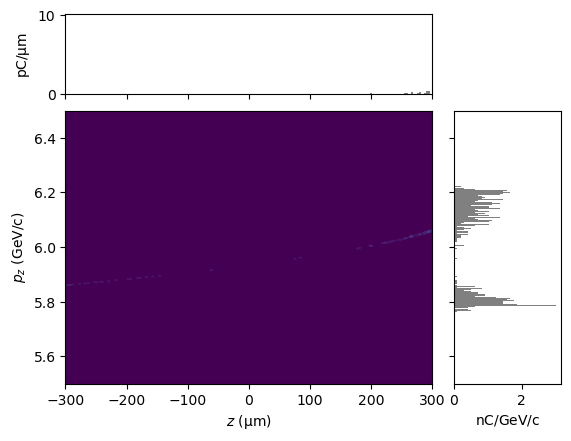

-47 -42


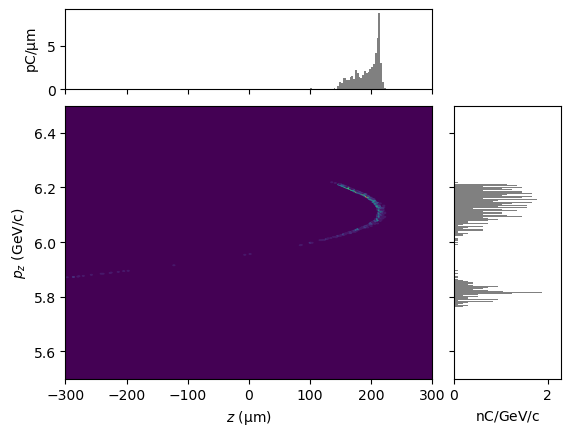

-47 -40


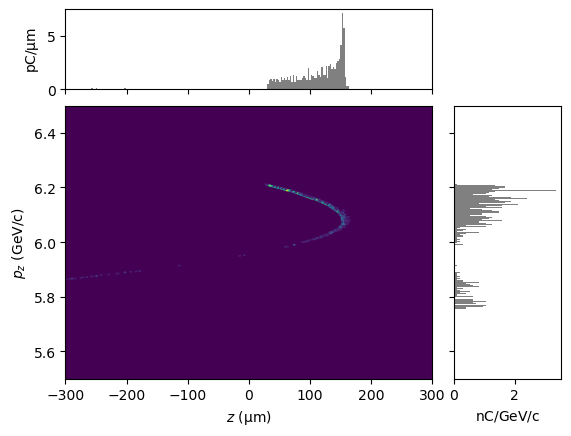

-47 -38


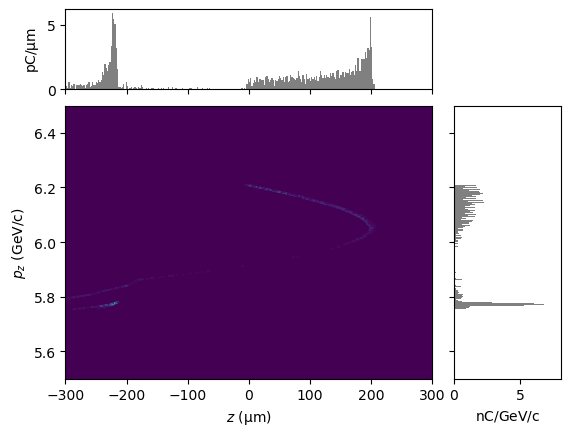

-47 -36


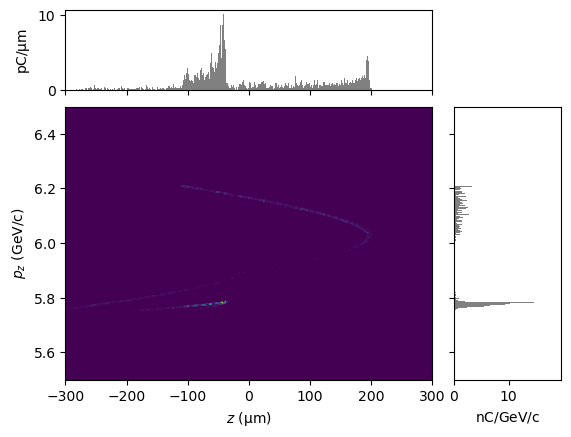

-47 -34


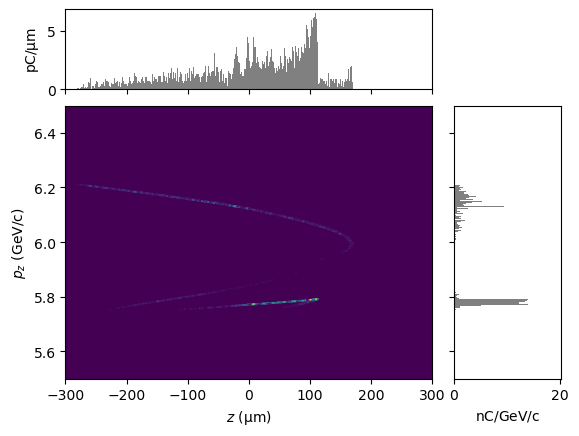

-47 -32


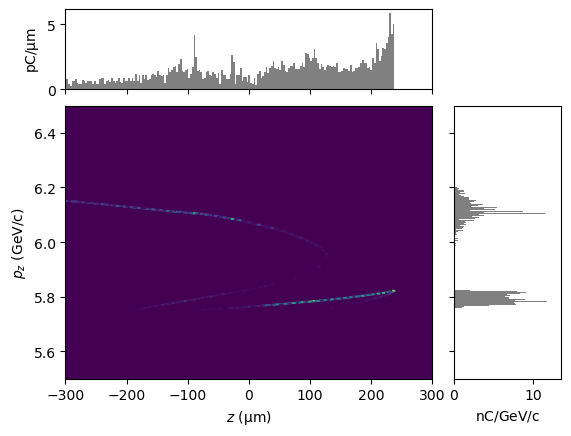

-45 -50


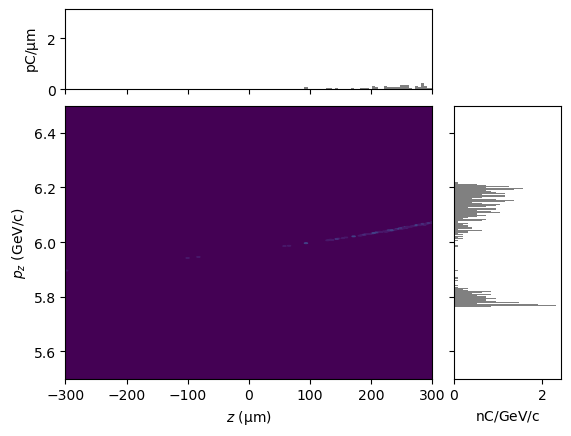

-45 -48


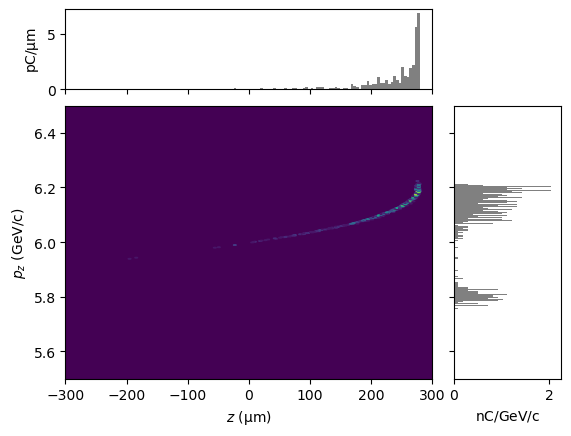

-45 -46


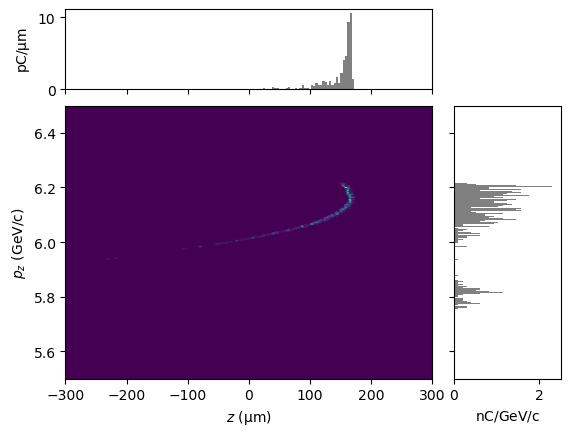

-45 -44


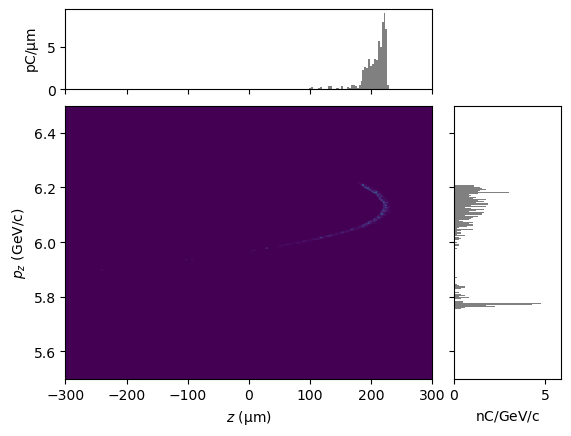

-45 -42


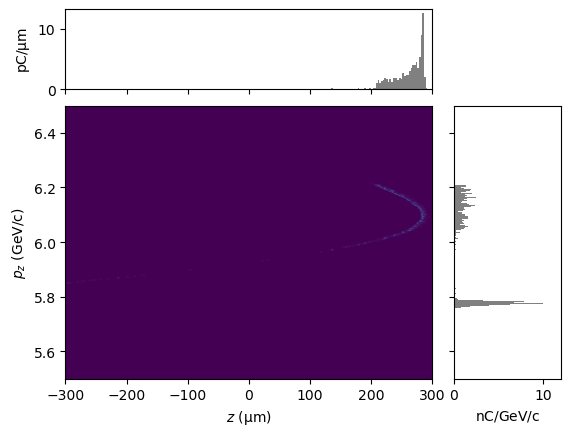

-45 -40


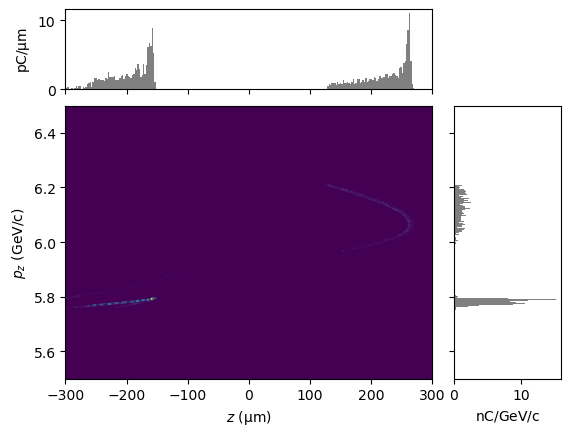

-45 -38


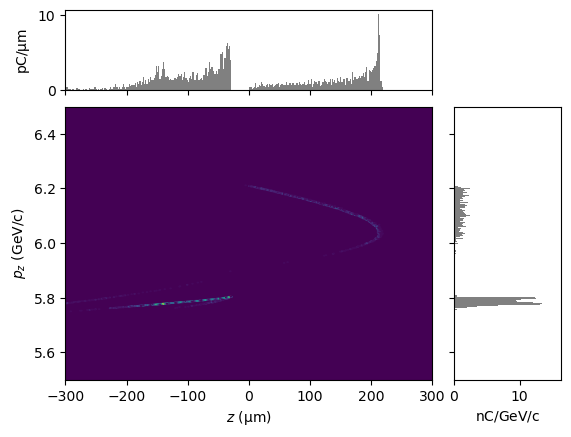

-45 -36


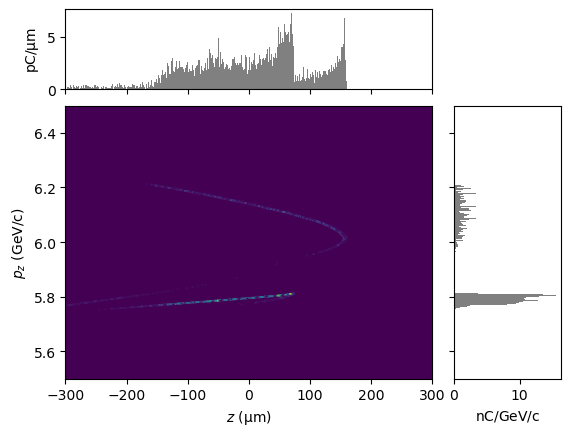

-45 -34


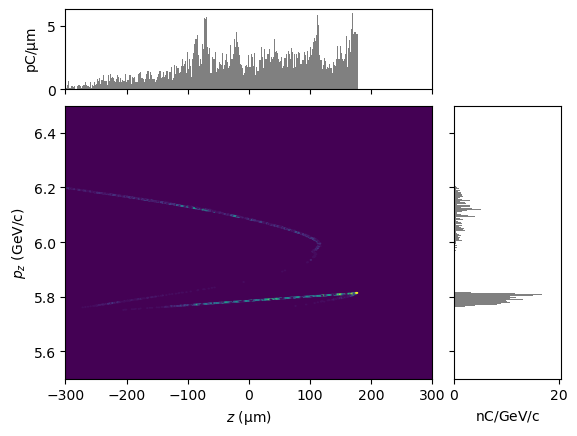

-45 -32


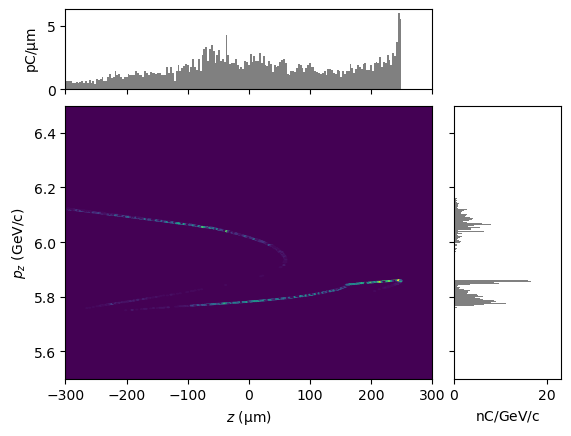

-43 -50


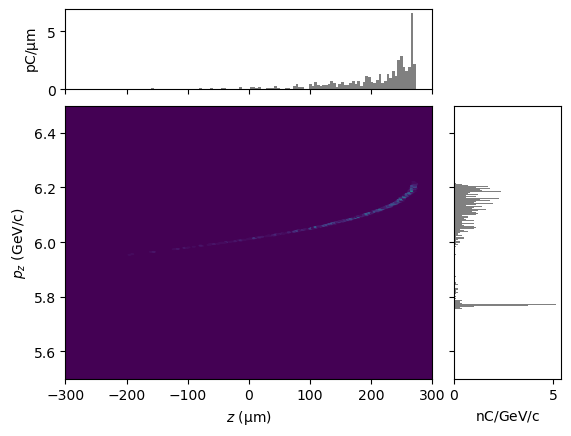

-43 -48


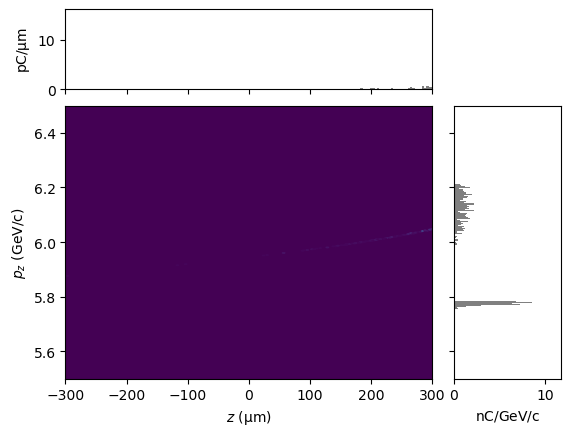

-43 -46


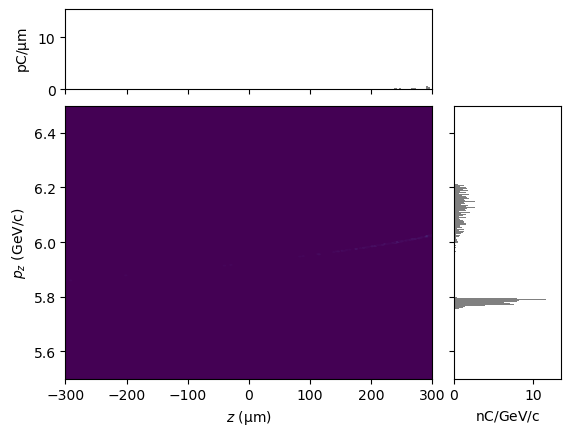

-43 -44


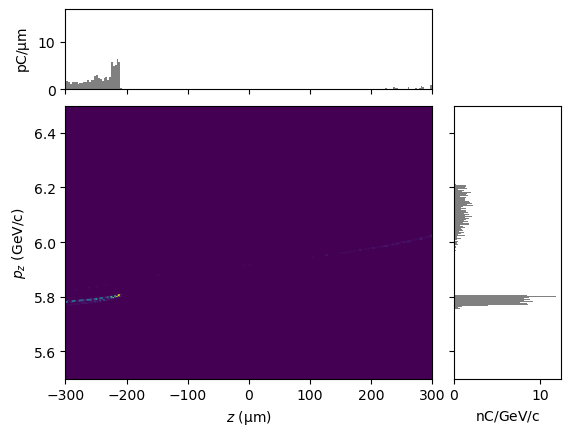

-43 -42


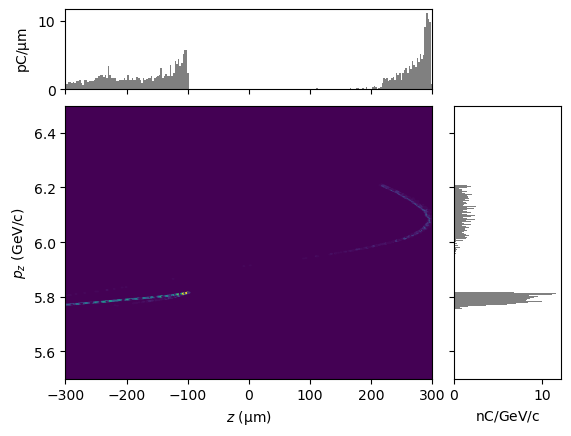

-43 -40


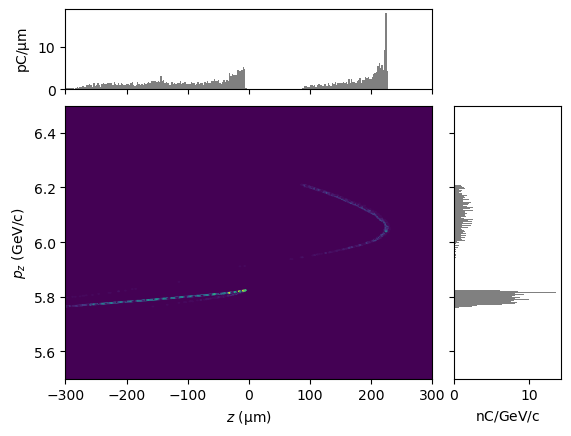

-43 -38


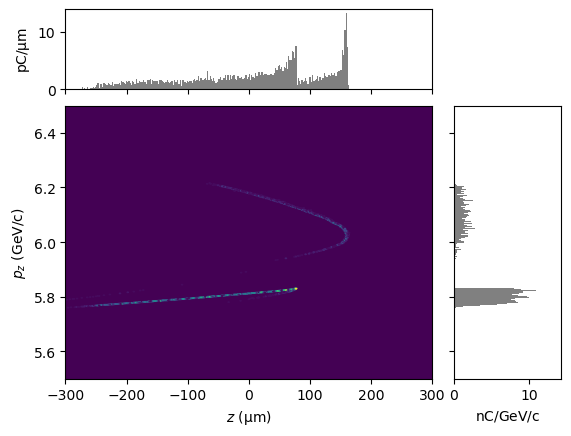

-43 -36


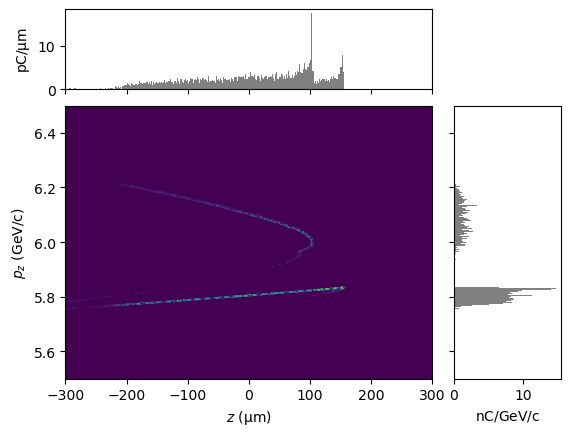

-43 -34


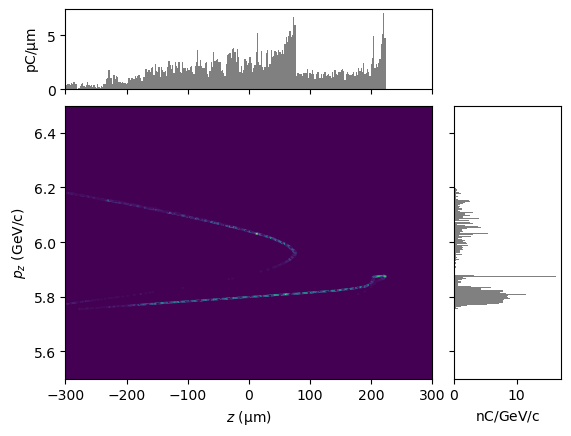

-43 -32


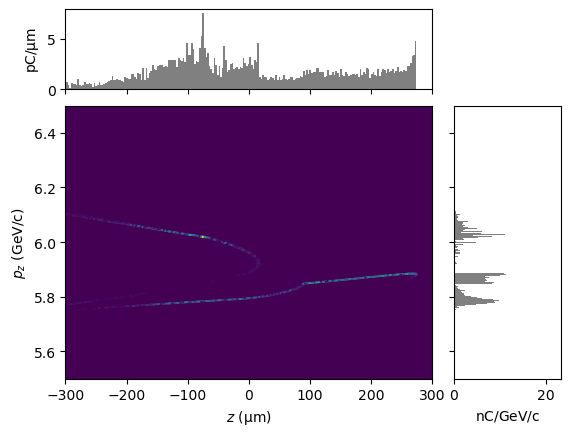

-41 -50


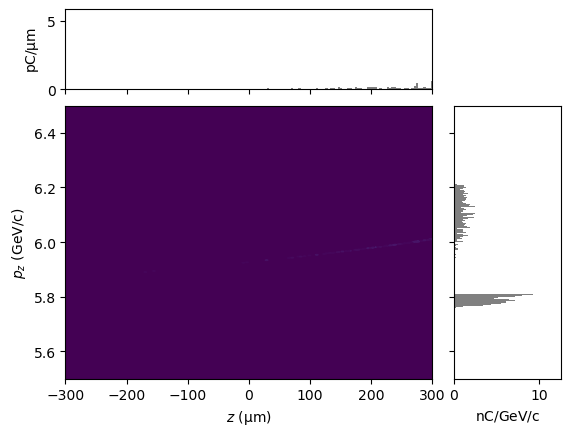

-41 -48


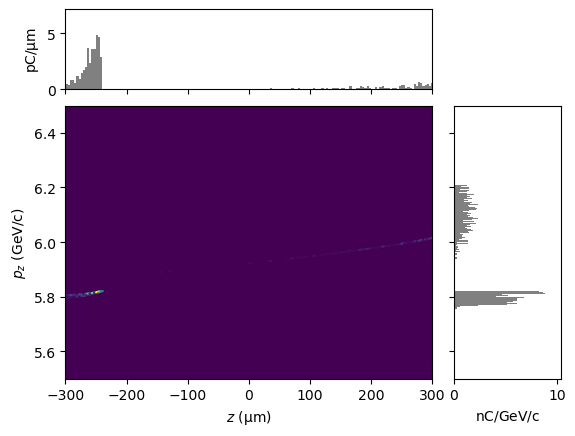

-41 -46


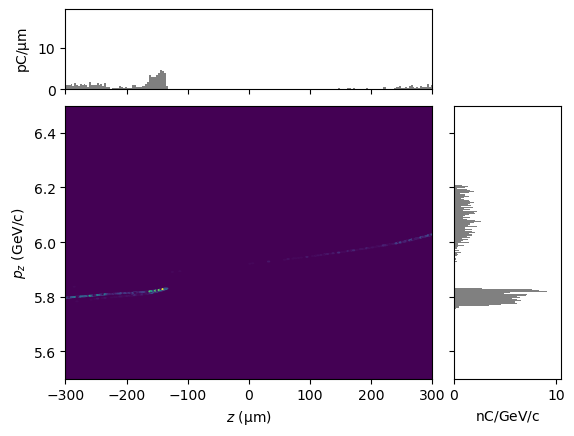

-41 -44


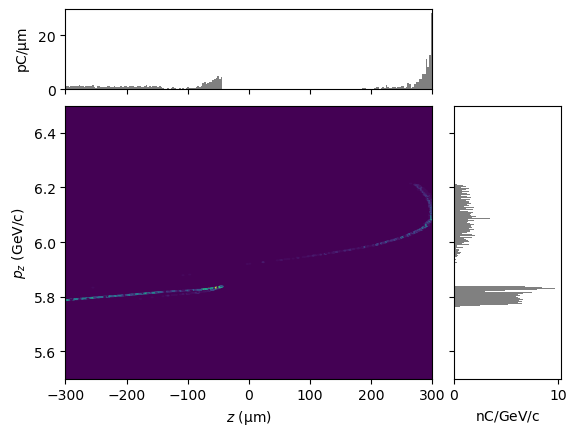

-41 -42


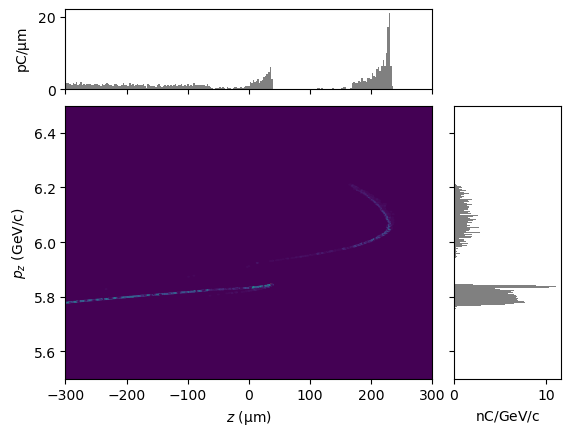

-41 -40


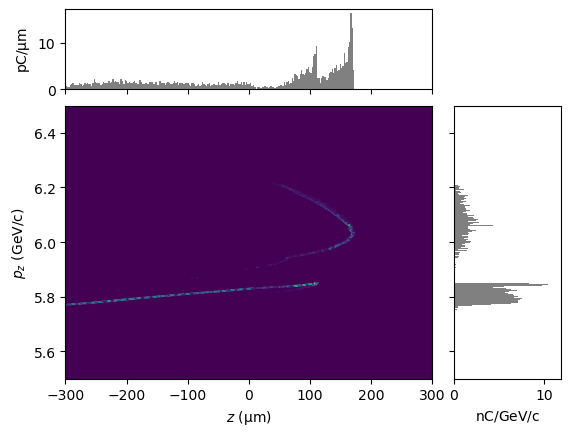

-41 -38


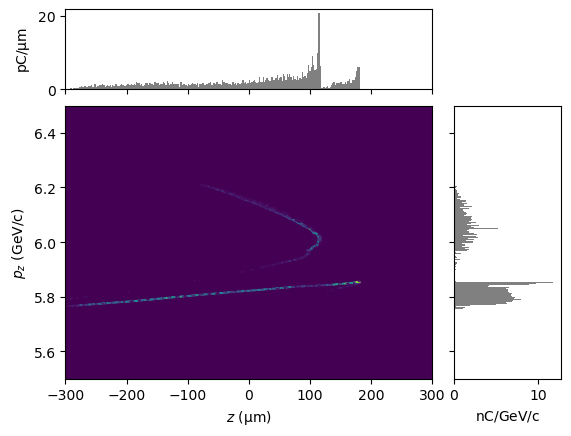

-41 -36


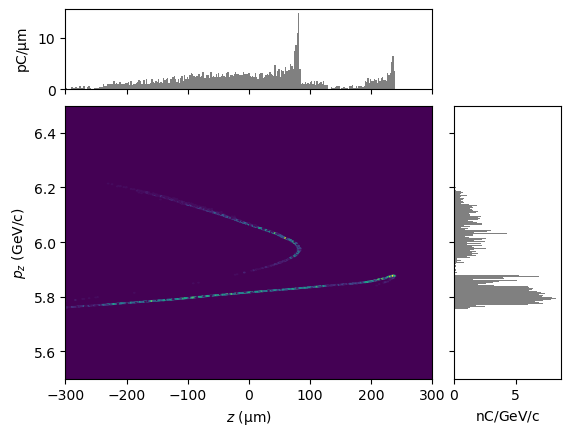

-41 -34


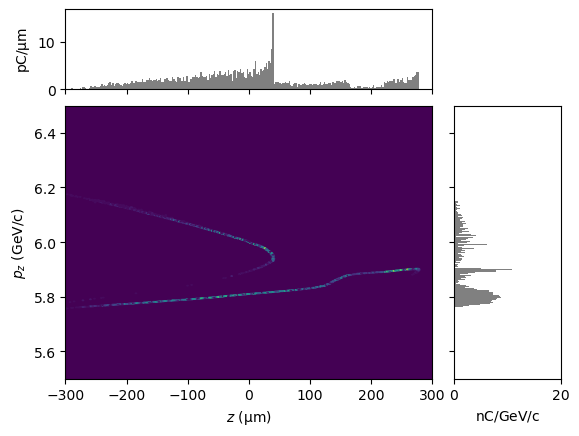

-41 -32


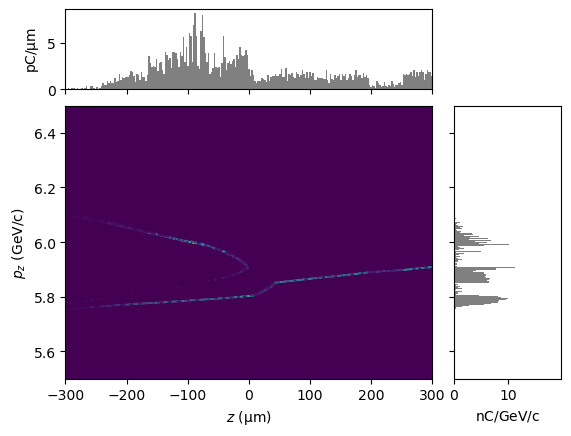

-39 -50


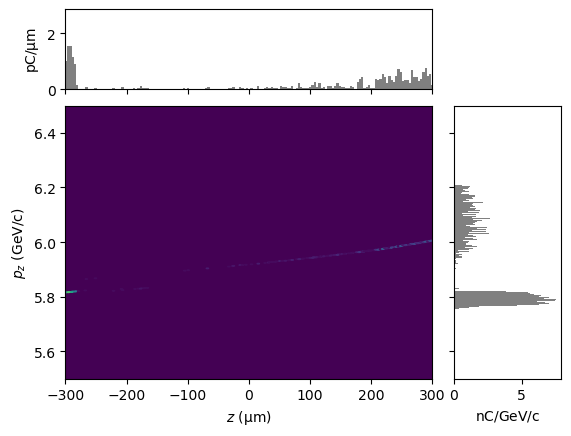

-39 -48


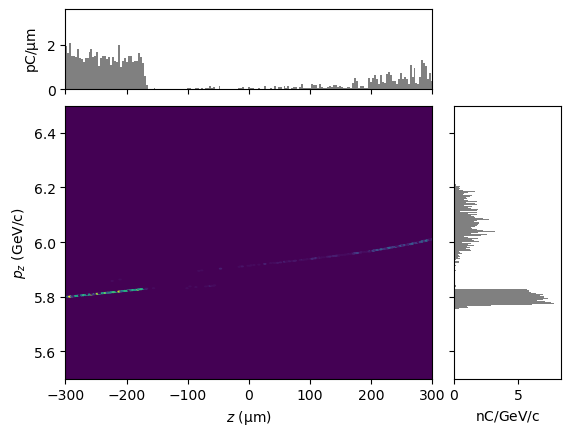

-39 -46


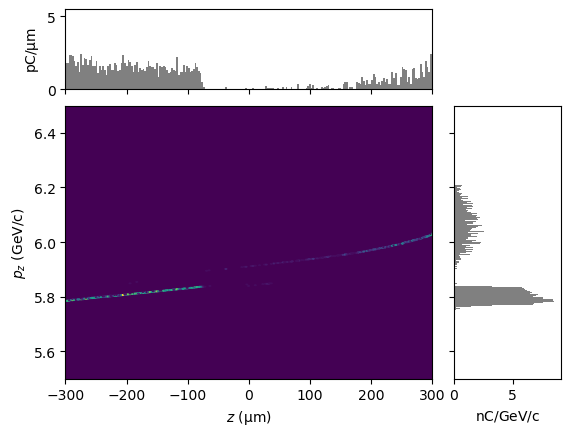

-39 -44


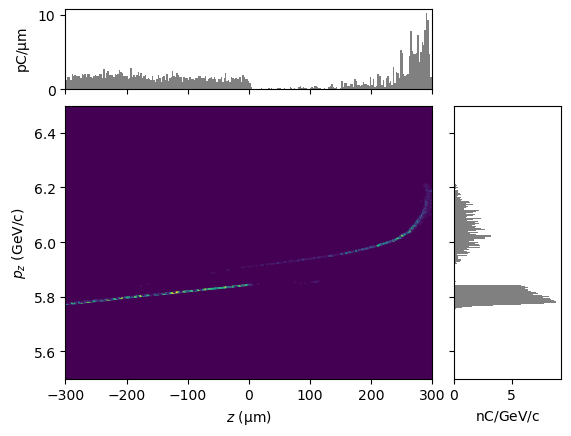

-39 -42


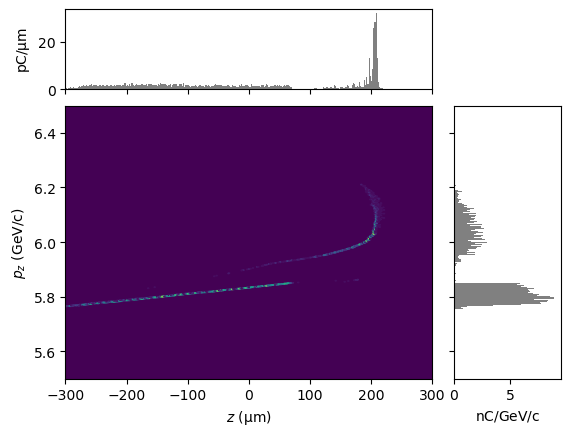

-39 -40


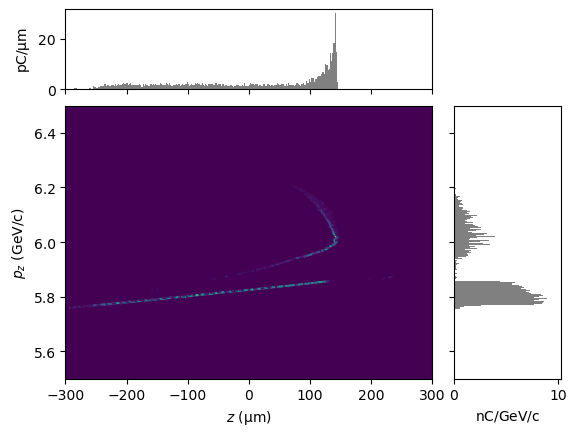

-39 -38


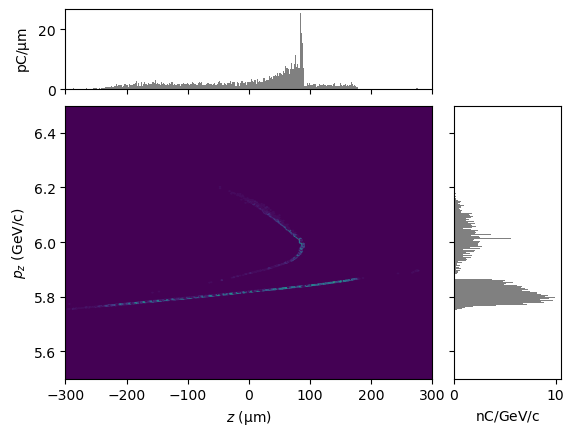

-39 -36


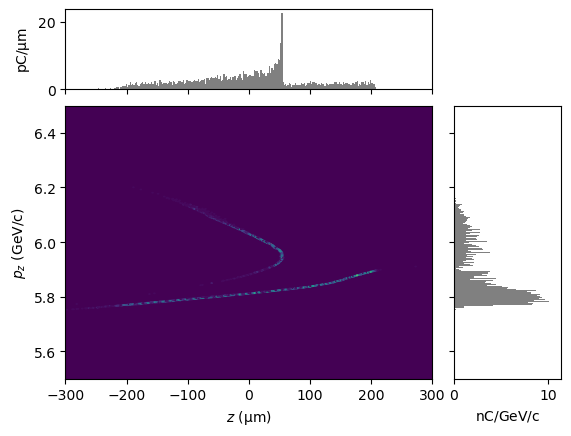

-39 -34


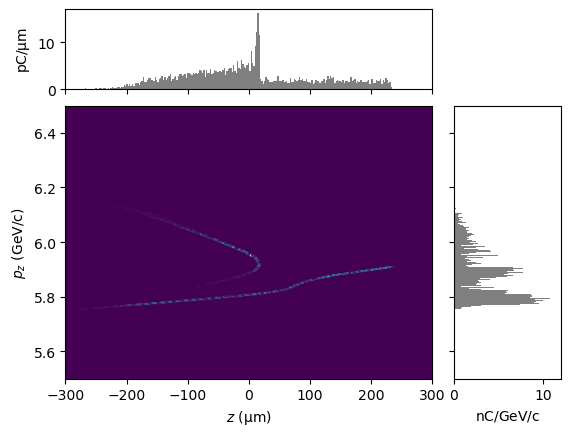

-39 -32


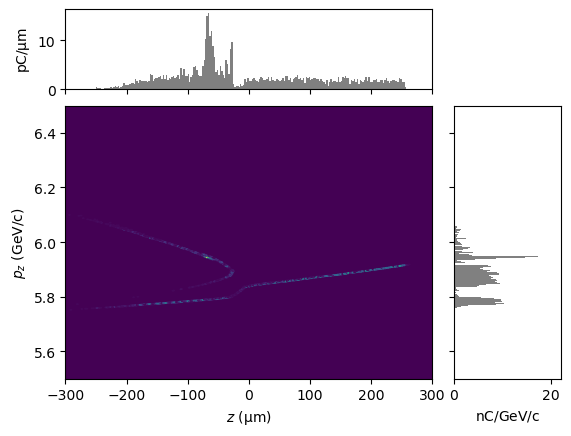

-37 -50


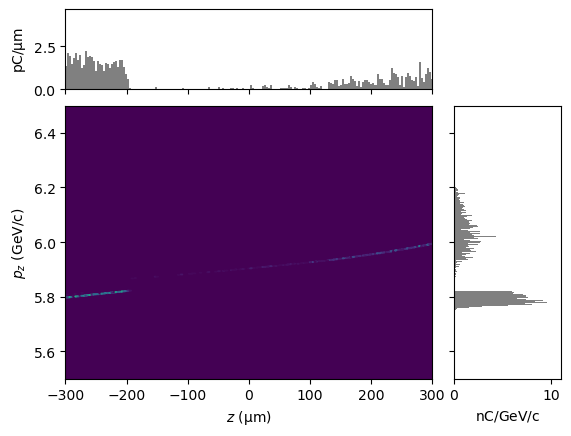

-37 -48


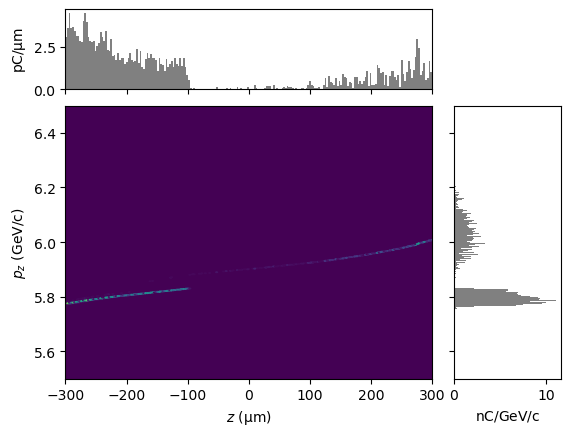

-37 -46


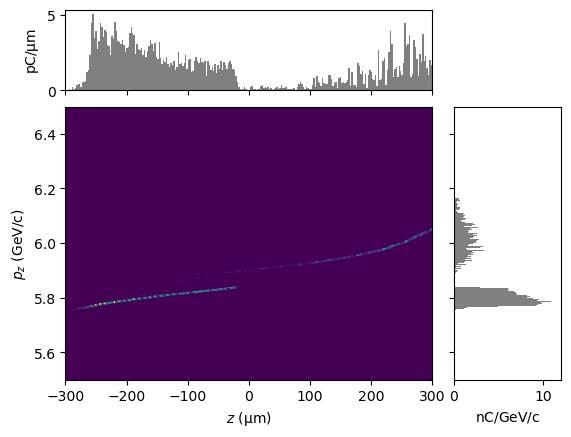

-37 -44


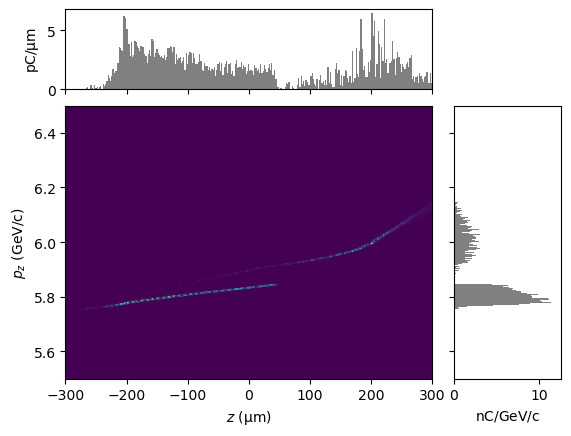

-37 -42


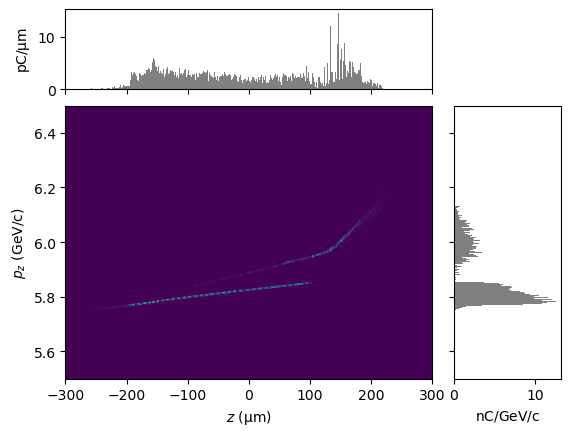

-37 -40


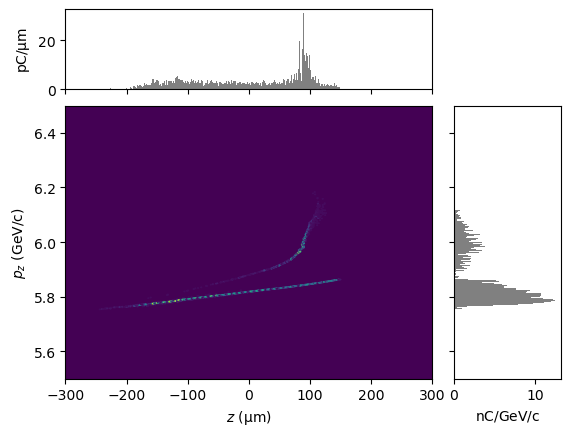

-37 -38


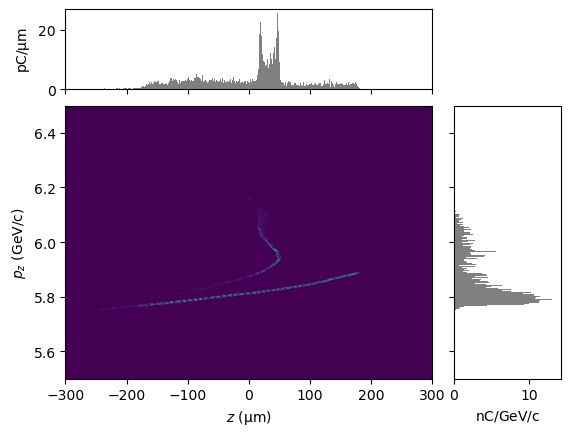

-37 -36


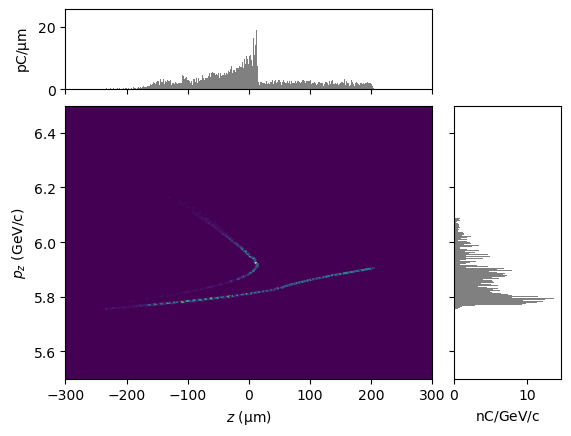

-37 -34


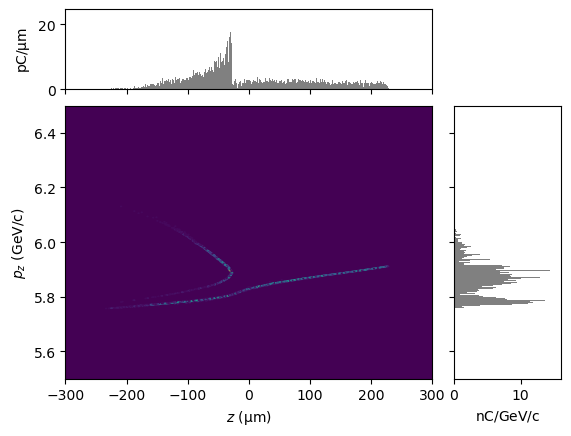

-37 -32


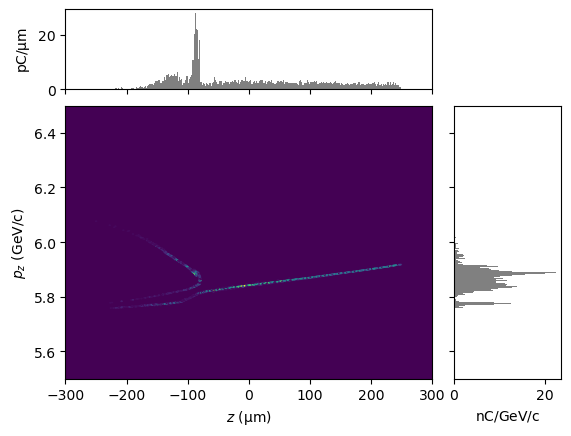

In [10]:
# Phase scan

# for L1PhaseSet in np.arange(-50, 10, 5):
#     for L2PhaseSet in np.arange(-50, 10, 5):

for L1PhaseSet in np.arange(-55, -35, 2):
    for L2PhaseSet in np.arange(-50, -30, 2):

        print(L1PhaseSet, L2PhaseSet)
        try:
    
    
            setLinacPhase(tao, "L1", L1PhaseSet)
            setLinacGradientAuto(tao, "L1", (0) + 0.335e9 - 0.125e9)
    
            setLinacPhase(tao, "L2", L2PhaseSet)
            setLinacGradientAuto(tao, "L2", (0) + 4.5e9 - 0.335e9)
            
            trackBeam(tao, **importedDefaultSettings)
            
            P = getBeamAtElement(tao, evalElement)
        
    
        
            #display(plotMod(P, 'z', 'pz', bins=300))
            #print( L1PhaseSet, ", ", L2PhaseSet, ", ", getBeamSpecs(P)["bunchSpacing"] ) 

            display(plotMod(P, 'z', 'pz', bins=300, xlim = (-300e-6, 300e-6), ylim = (5.5e9, 6.5e9)))
            
    
        except:
            print("Failed!")

    